In [1]:
from qiskit.circuit import Parameter, QuantumCircuit
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
theta_param = Parameter('θ')
phi_param = Parameter('φ')

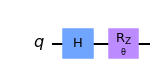

In [3]:
# circuit A
circuit_A = QuantumCircuit(1)

circuit_A.h(0)
circuit_A.rz(theta_param, 0)

%matplotlib inline
circuit_A.draw('mpl')

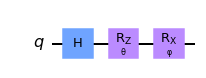

In [4]:
circuit_B = QuantumCircuit(1)

circuit_B.h(0)
circuit_B.rz(theta_param, 0)
circuit_B.rx(phi_param, 0)

%matplotlib inline
circuit_B.draw('mpl')

In [5]:
np.random.seed(0)
num_param = 1000

theta = [2*np.pi*np.random.uniform() for i in range(num_param)]
phi = [2*np.pi*np.random.uniform() for i in range(num_param)]

In [6]:
from qiskit.visualization.bloch import Bloch
from qiskit.quantum_info import Statevector

def state_to_bloch(state_vec):
    # Converts state vectors to points on the Bloch sphere
    phi = np.angle(state_vec.data[1])-np.angle(state_vec.data[0])
    theta = 2*np.arccos(np.abs(state_vec.data[0]))
    return [np.sin(theta)*np.cos(phi),np.sin(theta)*np.sin(phi),np.cos(theta)]

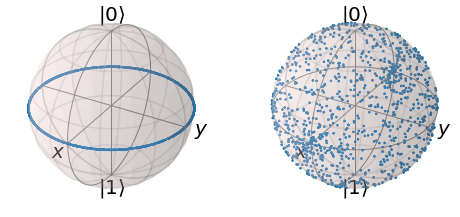

In [7]:
width, height = plt.figaspect(1/2)
fig = plt.figure(figsize=(width, height))
ax1, ax2 = fig.add_subplot(1, 2, 1, projection='3d'), fig.add_subplot(1, 2, 2, projection='3d')
b1,b2 = Bloch(axes=ax1), Bloch(axes=ax2)
b1.point_color, b2.point_color = ['tab:blue'],['tab:blue']
b1.point_marker, b2.point_marker= ['o'],['o']
b1.point_size, b2.point_size=[2],[2]

for i in range(num_param):    
    state_1 = Statevector.from_instruction(circuit_A.bind_parameters({theta_param:theta[i]}))
    state_2 = Statevector.from_instruction(circuit_B.bind_parameters({theta_param:theta[i], phi_param:phi[i]}))
    b1.add_points(state_to_bloch(state_1))
    b2.add_points(state_to_bloch(state_2))

b1.show()
b2.show()

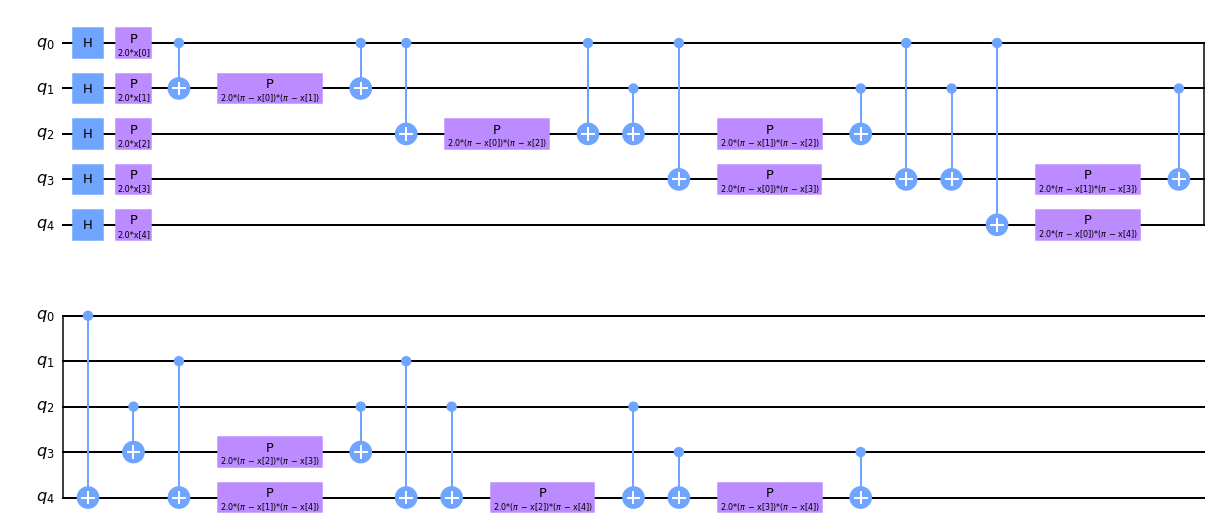

In [8]:
# we can also use a circuit defined in qiskit library
from qiskit.circuit.library import PauliFeatureMap

qc_tl = PauliFeatureMap(5, reps = 1)

qc_tl.decompose().draw()